###### 2020-11-05 목요일

# 11_비지도학습

 - 지도학습과는 다르게 비지도학습은 답이 주어져 있는 학습방법이 아니다.
 - 그러므로 정확도, 정밀도와 같은 모델성능평가지표를 사용할 수 없다.
 - 주로 사용하는 방법은 비슷한 데이터끼리 특성을 비교하여 같은 군집으로 모아주는 **군집화**와
 - Feature의 개수(엄밀히 말하자면, 데이터의 차원)을 줄여주는 **차원축소**등이 많이 쓰인다.
 - 지도학습을 이용하여 예측을 수행할때, 데이터에 따라서 전처리괴정에 비지도학습을 적절히 잘 수행해준다면 지도학습 모델의 성능을 높일 수 있다.

### 목차

#### 1. 군집화 : KMneans()

#### 2. iris data를 이용해 군집화를 실습홰보자

#### 3. 차원축소 : PCA

In [4]:
import warnings

warnings.filterwarnings('ignore')

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans

## 1. 군집화
   - KMeans() 함수를 이용해 유클리드거리에 기반한 군집화를 시행하고, 시각화를 해보자

#### (1) 임의의 데이터셋을 생성하자

In [13]:
df = pd.DataFrame(columns=('x', 'y'))

df.loc[0] = [7,1]
df.loc[1] = [2,1]
df.loc[2] = [4,2]
df.loc[3] = [9,4]
df.loc[4] = [10,5]
df.loc[5] = [10,6]
df.loc[6] = [11,5]
df.loc[7] = [11,6]
df.loc[8] = [15,3]
df.loc[9] = [15,2]
df.loc[10] = [16,6]
df.loc[11] = [16,1]

df

,x,y
0,7,1
1,2,1
2,4,2
3,9,4
4,10,5
5,10,6
6,11,5
7,11,6
8,15,3
9,15,2


#### (2) 임의의 데이터셋을 그래프에 점으로 찍어보라

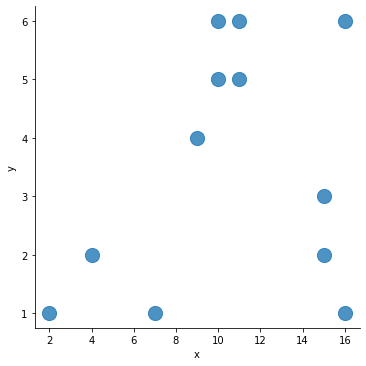

In [19]:
sns.lmplot(x='x', y='y', data=df, fit_reg=False, scatter_kws={'s' : 200})

In [21]:
data_points = df.values
data_points

array([[7, 1],
       [2, 1],
       [4, 2],
       [9, 4],
       [10, 5],
       [10, 6],
       [11, 5],
       [11, 6],
       [15, 3],
       [15, 2],
       [16, 6],
       [16, 1]], dtype=object)

#### (3) KMeans 알고리즘을 활용하여 군집화를 시행하라

In [25]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(data_points)
df['cluster'] = kmeans.labels_

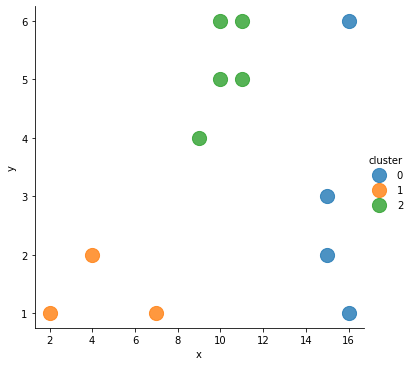

In [26]:
# 군집화의 시각화

sns.lmplot(x='x', y='y', data=df, fit_reg=False, scatter_kws={'s' : 200}, 
          hue='cluster')

#### 분류용 가상데이터 생성
 - make_blobs() : 등방성 가우시안 정규분포를 만들어주는 함수
     - n_samples : 표본수
     - n_features : 독립변수의 수
     - center : 클러스터의 수
     
##### make_blobs() 함수를 통해 임의의 데이터를 생성하고 군집화 + 시각화를 시행해보자

In [28]:
from sklearn.datasets import make_blobs

##### 임의의 데이터 생성

In [61]:
feature, label = make_blobs(n_samples=300, n_features=2, centers=3, random_state=1)

##### 군집화 시행

In [74]:
clu_mean = KMeans(n_clusters=3)
clu_mean.fit(feature)

# 군집화의 결과
print(clu_mean.labels_)

# 군집화의 centroid
print(clu_mean.cluster_centers_)

[0 2 0 1 1 1 0 1 1 2 2 2 0 0 2 1 0 0 1 0 0 0 1 1 1 0 0 1 0 0 1 2 2 0 2 0 2
 1 2 1 1 2 1 1 0 0 1 2 0 0 2 0 0 0 1 0 1 2 1 0 0 2 2 1 1 2 2 1 2 0 1 1 1 0
 1 0 2 1 1 0 0 0 1 0 1 2 0 0 1 0 2 1 0 2 0 2 0 0 2 2 0 2 1 2 2 1 1 0 2 0 2
 0 2 1 0 1 2 0 0 1 0 1 2 0 2 1 1 0 2 0 2 0 1 2 2 0 2 0 0 0 2 1 1 2 0 2 1 0
 2 1 2 0 2 0 1 2 2 0 2 0 0 1 1 2 1 0 2 1 1 0 1 0 0 1 1 1 2 0 2 2 1 0 1 0 1
 1 1 2 0 2 0 1 1 1 1 0 1 0 1 1 2 2 0 2 2 1 2 0 2 0 1 2 2 1 2 1 2 0 1 1 0 2
 0 1 2 1 0 1 1 2 1 0 2 2 1 2 0 2 2 1 2 1 2 0 1 2 1 1 1 0 1 2 0 2 1 2 0 2 0
 1 0 2 1 0 2 1 1 0 0 2 2 1 2 2 1 2 2 2 1 2 1 2 0 2 2 0 2 0 2 2 0 0 1 0 0 1
 0 2 2 2]
[[-10.07499139  -3.8699274 ]
 [ -1.4531567    4.40756967]
 [ -7.05318146  -8.00168371]]


##### 시각화

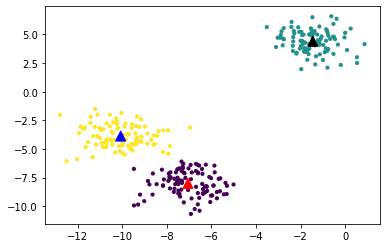

In [64]:
plt.scatter(feature[:, 0], feature[:,1],
            c=clu_mean.labels_,
            marker='o',
            s=10)

plt.scatter(clu_mean.cluster_centers_[:, 0], clu_mean.cluster_centers_[:, 1],
           c = ['r', 'k', 'b'],
           marker = '^',
           s = 100)


## 2. iris data를 이용해 군집화를 실습홰보자

In [47]:
from sklearn.datasets import load_iris

In [54]:
iris = load_iris()

##### iris데이터 데이터프레임화 하기

In [70]:
iris_df = pd.DataFrame(iris.data,
                       columns=iris.feature_names)

iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


##### KMeans 함수를 이용해 iris데이터를 군집화를 시행하라

In [75]:
cluster = KMeans(n_clusters=3)
cluster.fit(iris_df)

print(cluster.labels_)
print(cluster.cluster_centers_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]
[[5.9016129  2.7483871  4.39354839 1.43387097]
 [5.006      3.428      1.462      0.246     ]
 [6.85       3.07368421 5.74210526 2.07105263]]


##### 위 결과를(군집화 결과로 나온 라벨을) iris_df에 칼럼으로 추가하라

In [78]:
iris_df['cluster_label'] = cluster.labels_

# 원래 target값도 한번 추가해보자
iris_df['target'] = iris.target

iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cluster_label,target
0,5.1,3.5,1.4,0.2,1,0
1,4.9,3.0,1.4,0.2,1,0
2,4.7,3.2,1.3,0.2,1,0
3,4.6,3.1,1.5,0.2,1,0
4,5.0,3.6,1.4,0.2,1,0


##### 군집화의 결과와 실제값의 결과를 비교하는 것은 의미가 없지만..
   - 그룹으로 묶어 빈도를 확인해보자

In [80]:
iris_group_cnt = iris_df.groupby(['target', 'cluster_label']).count()['sepal length (cm)']
iris_group_cnt

target  cluster_label
0       1                50
1       0                48
        2                 2
2       0                14
        2                36
Name: sepal length (cm), dtype: int64

## 3. 차원축소 : PCA
   - 데이터 프레임의 Feature를 축소하는 기법이다.
   - 극단적으로 표현하면, 데이터프레임에서 행보다 열의 수가 많을때 차원축소는 매우 효율적인 방법이 될 수 있다.
   - 하지만, 데이터에 따라서 무조건 모델의 성능을 높이는 방법은 아니기때문에, 분석가의 역량과 주관적인 판단에 따라서 차원축소를 적용할지 안할지 잘 선택해야한다.
   
   
##### iris 데이터를 이용해 PCA를 실습해보자

In [82]:
pca_iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
pca_iris_df['target'] = iris.target
pca_iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


##### 차원축소전에  데이터를 2차원 평면에 시각화 하여 데이터를 확인해보자

Text(0, 0.5, 'sepal width (cm)')

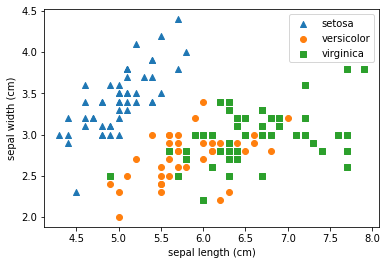

In [90]:
markers = ['^', 'o', 's']

for i, marker in enumerate(markers):
    x_data_point = pca_iris_df[pca_iris_df['target'] == i]['sepal length (cm)']
    y_data_point = pca_iris_df[pca_iris_df['target'] == i]['sepal width (cm)']
    
    plt.scatter(x_data_point, y_data_point, marker=marker, label=iris.target_names[i])
    
plt.legend()
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')

 - "sepal length (cm)"와 "sepal width (cm)"를 이용한 시각화 결과, `versicolor`와 `virginica`의 경우의 데이터가 뒤섞여 있어 군집화가 힘들거 같다
 - 그래서 PCA를 통해 차원을 축소하고 군집화를 시행해보자

##### PCA를 통해 차원축소를 진행하고 군집화를 적용하자
   - 1. 주성분을 2개로 하여 PCA를 진행하라
   - 2. 2개의 주성분을 이용하여 Kmeans 함수를 적용해 3개의 군집화를 시행하라

In [106]:
feature_df = pca_iris_df.drop(['target'], inplace=False, axis=1)

In [105]:
from sklearn.decomposition import PCA

In [147]:
# 주성분이 2로 PCA를 진행하자
pca = PCA(n_components = 2)
pca.fit(feature_df)
pca_feature_df = pd.DataFrame(pca.transform(feature_df), columns=['PCA1', 'PCA2'])

pca_feature_df.head(10)

,PCA1,PCA2
0,-2.684126,0.319397
1,-2.714142,-0.177001
2,-2.888991,-0.144949
3,-2.745343,-0.318299
4,-2.728717,0.326755
5,-2.280860,0.741330
6,-2.820538,-0.089461
7,-2.626145,0.163385
8,-2.886383,-0.578312
9,-2.672756,-0.113774


In [149]:
# 군집화하기
kmeans = KMeans(n_clusters=3)
kmeans.fit(pca_feature_df)

# 군집화 결과를 PCA된 데이터프레임에 입력하기
pca_feature_df["K-mean's result"] = kmeans.labels_


pca_feature_df.head(10)

,PCA1,PCA2,K-mean's result
0,-2.684126,0.319397,1
1,-2.714142,-0.177001,1
2,-2.888991,-0.144949,1
3,-2.745343,-0.318299,1
4,-2.728717,0.326755,1
5,-2.280860,0.741330,1
6,-2.820538,-0.089461,1
7,-2.626145,0.163385,1
8,-2.886383,-0.578312,1
9,-2.672756,-0.113774,1


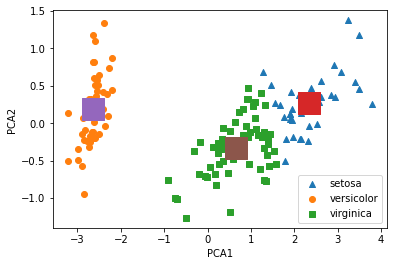

In [159]:
# 시각화
markers = ['^', 'o', 's']

for i, marker in enumerate(markers):
    x_data_point = pca_feature_df[pca_feature_df["K-mean's result"] == i]['PCA1']
    y_data_point = pca_feature_df[pca_feature_df["K-mean's result"] == i]['PCA2']
    
    plt.scatter(x_data_point, y_data_point, marker=marker, label=iris.target_names[i])
    
plt.legend()
plt.xlabel('PCA1')
plt.ylabel('PCA2')

## Centroid 표시하기
for centroid_X, centroid_Y in kmeans.cluster_centers_:
    plt.scatter(centroid_X, centroid_Y, marker='s', s=500)

##### 위 과정에서 정규화 까지 해보자
   - 1. 각 Feature들에 StandardScaler 정규화를 진행하라
   - 2. 주성분을 2개로 하여 PCA를 진행하라
   - 3. 2개의 주성분을 토대로 KMeans함수를 이용해 군집을 3개로 설정하여 군집화를 진행하라

In [91]:
from sklearn.preprocessing import StandardScaler

In [172]:
# Feature의 정규화 진행을 위해 target제거
for_standard_df = pca_iris_df.drop(['target'], inplace=False, axis=1)

# 정규화진행 + 데이터프레임으로 만들기
standard = StandardScaler()
standard.fit(for_standard_df)
standard_df = pd.DataFrame(standard.transform(for_standard_df), columns=for_standard_df.columns)

standard_df.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444
5,-0.537178,1.939791,-1.169714,-1.052180
6,-1.506521,0.788808,-1.340227,-1.183812
7,-1.021849,0.788808,-1.283389,-1.315444
8,-1.748856,-0.362176,-1.340227,-1.315444
9,-1.143017,0.098217,-1.283389,-1.447076


In [173]:
# PCA 진행 + 결과값 데이터프레임화하기
pca = PCA(n_components=2)
pca.fit(standard_df)
standard_PCA_df = pd.DataFrame(pca.transform(standard_df), columns = ['Standard_PCA1', 'Standard_PCA2'])

# 군집화하기
kmeans = KMeans(n_clusters=3)
kmeans.fit(standard_PCA_df)

# 군집화 결과를 PCA된 데이터프레임에 입력하기
standard_PCA_df["K-mean's result"] = kmeans.labels_

standard_PCA_df.head(10)

,Standard_PCA1,Standard_PCA2,K-mean's result
0,-2.264703,0.480027,1
1,-2.080961,-0.674134,1
2,-2.364229,-0.341908,1
3,-2.299384,-0.597395,1
4,-2.389842,0.646835,1
5,-2.075631,1.489178,1
6,-2.444029,0.047644,1
7,-2.232847,0.223148,1
8,-2.334640,-1.115328,1
9,-2.184328,-0.469014,1


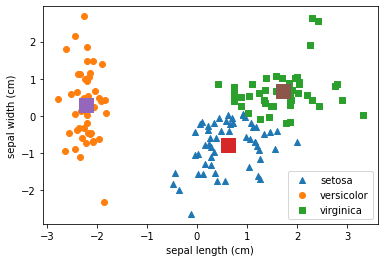

In [174]:
# 정규화 + PCA 진행 결과 시각화

markers = ['^', 'o', 's']

for i, marker in enumerate(markers):
    x_data_point = standard_PCA_df[standard_PCA_df["K-mean's result"] == i]['Standard_PCA1']
    y_data_point = standard_PCA_df[standard_PCA_df["K-mean's result"] == i]['Standard_PCA2']
    
    plt.scatter(x_data_point, y_data_point, marker=marker, label=iris.target_names[i])
    
plt.legend()
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')


# Centroid 표시하기

for X, Y in kmeans.cluster_centers_:
    plt.scatter(X, Y, marker='s', s=200)

In [170]:
kmeans.cluster_centers_

array([[-2.22475316,  0.28892745],
       [ 0.61742366, -0.79845836],
       [ 1.71731904,  0.65486305]])